<a href="https://colab.research.google.com/github/jhuarancca/InteligenciaArtificialEnSalud/blob/main/Notebook_1_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://cloud.screenpresso.com/BiF4bZJT2saz/2024-10-03_06h25_42_original.png?_gl=1*1p2hf0x*_ga*OTY3NTc2Mjc4LjE3Mjc5Mjk1ODc.*_ga_Y5Z2778Y7J*MTcyNzkyOTU4Ny4xLjAuMTcyNzkyOTU4Ny4wLjAuMA.." width="2400">


# **Notebook 1: Introducción a Machine Learning y Redes Neuronales Artificiales (ANN)**

## **1. Introducción a Machine Learning**



### **1.1. Definición de Machine Learning**
El **Machine Learning** (ML) permite a las máquinas aprender a partir de datos y hacer predicciones. Los modelos de ML se entrenan con datos históricos para predecir nuevos datos.

- **Supervisado**: El modelo aprende de datos etiquetados.
- **No Supervisado**: El modelo busca patrones en datos no etiquetados.
- **Refuerzo**: El modelo aprende mediante recompensas y penalizaciones.

### **1.2. Redes Neuronales en Machine Learning**
Las **redes neuronales artificiales (ANN)** son modelos poderosos inspirados en el cerebro humano, que son particularmente útiles en problemas como reconocimiento de imágenes y procesamiento de lenguaje.


## **2. Tensores y Operaciones Básicas**


### **2.1. ¿Qué es un Tensor?**
Un **tensor** es una estructura de datos que puede representar un número, un vector, una matriz o una estructura de mayor dimensión, ideal para modelar datos en redes neuronales.


In [ ]:
import tensorflow as tf

# Crear tensores
tensor_esc = tf.constant(42)  # Escalar
tensor_vec = tf.constant([1, 2, 3])  # Vector
tensor_mat = tf.constant([[1, 2], [3, 4]])  # Matriz

print("Escalar:", tensor_esc.numpy())
print("Vector:", tensor_vec.numpy())
print("Matriz:\n", tensor_mat.numpy())

Escalar: 42
Vector: [1 2 3]
Matriz:
 [[1 2]
 [3 4]]



### **2.2. Operaciones con Tensores**
Las operaciones con tensores son fundamentales en redes neuronales, ya que permiten realizar cálculos eficientes.

In [ ]:
# Operaciones básicas con tensores
tensor_sum = tf.add(tensor_vec, tensor_vec)
tensor_prod = tf.matmul(tensor_mat, tensor_mat)

print("Suma de tensores:", tensor_sum.numpy())
print("Producto punto entre matrices:\n", tensor_prod.numpy())

Suma de tensores: [2 4 6]
Producto punto entre matrices:
 [[ 7 10]
 [15 22]]


### **2.3. Manejo de Datasets con TensorFlow**
Para grandes volúmenes de datos, TensorFlow proporciona la API `tf.data` que permite manejar datasets de manera eficiente.

In [ ]:
# Crear un dataset simple de ejemplo
train_dataset = tf.data.Dataset.from_tensor_slices((tensor_vec, tensor_vec))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(2)

# Mostrar algunos ejemplos
for x, y in train_dataset.take(1):
    print(f"Entrada: {x.numpy()}, Etiqueta: {y.numpy()}")

Entrada: [1 2], Etiqueta: [1 2]


## **3. ¿Qué es una GPU y cómo usarla en TensorFlow?**

Una **GPU** es una unidad de procesamiento diseñada para realizar cálculos en paralelo, lo que la hace ideal para tareas como entrenar redes neuronales.

Las **CPU** están optimizadas para tareas secuenciales, mientras que las **GPU** están diseñadas para cálculos en paralelo, ideales para redes neuronales.


### **3.1. Usar la GPU en TensorFlow**

In [ ]:
# Verificar si TensorFlow está usando la GPU
print("GPUs disponibles:", tf.config.list_physical_devices('GPU'))

GPUs disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## **4. Implementando una Red Neuronal**


El aprendizaje de una red neuronal consiste en ajustar los pesos para minimizar el error entre la predicción y el valor real. Esto se realiza mediante el algoritmo de gradiente descendente.

$ w := w - \alpha \nabla J(w) $

Donde

* $w$ son los parámetros (pesos) del modelo.
* $\alpha$ es la tasa de aprendizaje, un hiperparámetro que controla el tamaño de los pasos que damos para ajustar los pesos.
* $\nabla J(w)$ es el gradiente de la función de costo con respecto a $w$.


<img src="https://sebastianraschka.com/images/faq/gradient-optimization/ball.png" width="700">

Claro que a nivel matemático de las redes neuronales la funció de costo $J(w)$ es un poco más complicado que solo una parábola. Pero el análisis es similar.

De manera simple, este se implementa de la siguiente manera:

Como vimos en la parte teórica, una neurona es básicamente una suma ponderada:

$ z = x \times w + b $

Que luego pasaremos por nuestra función de activación, en este caso una función de activación ReLU que convierte en lineal lo mayor a 0

In [ ]:
import numpy as np

# Simulación de una red con una capa
def simple_neuron(input_data, weight, bias):
  z = np.dot(input_data, weight) + bias
  return np.maximum(0, z)  # Función ReLU

Asumimos valores iniciales arbitrarios con pesos de 0.5 y -0.5:

$w = [0.5 , -0.5]$ y $b = [1.0] $

In [ ]:
# Datos de entrada, pesos y sesgo
input_data = np.array([1, 2])
weight = np.array([0.5, -0.5])
bias = 1.0

In [ ]:
# Salida antes del ajuste de pesos
output = simple_neuron(input_data, weight, bias)
print("Salida inicial de la neurona:", output)

Salida inicial de la neurona: 0.5


In [ ]:
# Simulación de ajuste de peso con gradiente descendente
learning_rate = 0.01
error = output - np.array([1, 1])  # Suponiendo la salida deseada es [1, 1]
weight -= learning_rate * error
print("Pesos ajustados:", weight)

Pesos ajustados: [ 0.505 -0.495]


In [ ]:
output = simple_neuron(input_data, weight, bias)
print("Salida después del ajuste de pesos:", output)

Salida después del ajuste de pesos: 0.515


### **4.1. Algoritmo de Backpropagation**

Pero aquello no era suficiente, pues el ajustar los pesos de una capa, implicaba también ajusta los pesos de las siguientes capas, lo cual lo volvía una tarea muy complicada de ejecutar. El algoritmo de **backpropagation** (retropropagación) fue desarrollado en los años 80 y revolucionó el entrenamiento de redes neuronales, permitiendo ajustar los pesos de todas las capas de la red de manera eficiente.


<img src="https://editor.analyticsvidhya.com/uploads/18870backprop2.png" width="700">

## **5. Introducción a Keras y el Modelo de Clasificación con MNIST**


**MNIST** es un conjunto de datos que contiene imágenes de dígitos escritos a mano (0-9). Se utiliza frecuentemente como referencia para entrenar modelos de clasificación.

### **5.1. Implementación de una Red Neuronal para Clasificación con MNIST**
Usaremos **Keras**, una API de alto nivel en TensorFlow, para implementar una red neuronal simple.

In [ ]:
# Cargar y normalizar el dataset MNIST
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Crear el modelo con Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplanar las imágenes
    Dense(128, activation='relu'),  # Capa oculta
    Dense(10)  # Capa de salida con 10 clases
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5652 - loss: 1.6588
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8627 - loss: 0.5324
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8921 - loss: 0.3943
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9028 - loss: 0.3454
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9096 - loss: 0.3169


### **5.2. Evaluación del Modelo**

In [ ]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Precisión en el conjunto de prueba:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.9160 - loss: 0.2981
Precisión en el conjunto de prueba: 0.9160000085830688


## **6. Limitaciones de las Redes Neuronales en Imágenes**

### **6.1. Limitaciones de las ANN en Imágenes**
Las redes neuronales tradicionales, como las que acabamos de implementar, tienen dificultades para procesar imágenes. Esto se debe a que no capturan las **relaciones espaciales** entre los píxeles. Veamos esto con un ejemplo.

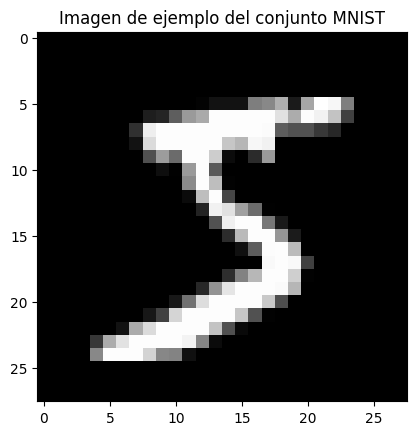

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
Predicción para la imagen aplanada: 5


In [ ]:
# Ver cómo una red neuronal trata cada píxel de manera individual
import matplotlib.pyplot as plt

# Mostrar una imagen del dataset MNIST
plt.imshow(x_train[0], cmap='gray')
plt.title("Imagen de ejemplo del conjunto MNIST")
plt.show()

# Aplanar la imagen y pasarla por la red (sin considerar la estructura espacial)
prediction = model.predict(x_train[0].reshape(1, 28, 28))
print("Predicción para la imagen aplanada:", prediction.argmax())

El modelo trata cada píxel de la imagen de forma independiente. Aunque la red puede aprender a clasificar, no está aprovechando la **estructura espacial** de la imagen, lo que limita su capacidad.

In [ ]:
# Ver cómo el aplanamiento pierde la estructura de la imagen
flattened_image = x_train[0].reshape(-1)
print("Imagen aplanada (primeros 200 valores):", flattened_image[:200])

Imagen aplanada (primeros 200 valores): [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00

Al tratar los píxeles de manera independiente, la red no puede detectar patrones espaciales como bordes o formas, lo que es fundamental para el procesamiento eficiente de imágenes.


## **Ejercicio 1: Clasificación de Imágenes utilizando el Dataset Fashion MNIST**

### **Objetivo:**
En este ejercicio, trabajarás con el dataset **Fashion MNIST** para clasificar imágenes de prendas de ropa utilizando una red neuronal con TensorFlow y Keras. Además, investigarás las funciones de activación disponibles en Keras y cómo afectan al rendimiento del modelo. Al final, reflexionarás sobre los resultados obtenidos y las posibles mejoras.

### **Instrucciones:**

1. **Descripción del Dataset:**
   - **Fashion MNIST** es un dataset similar a MNIST pero contiene imágenes de 10 categorías de ropa en lugar de dígitos. Cada imagen es en escala de grises con tamaño 28x28 píxeles.
   - El dataset ya está disponible en TensorFlow y puede cargarse de la misma manera que MNIST.
   
2. **Carga y Preprocesamiento de Datos:**
   - Carga el dataset Fashion MNIST usando TensorFlow:
     ```python
     from tensorflow.keras.datasets import fashion_mnist
     (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
     ```
   - Normaliza los valores de los píxeles para que estén en el rango de [0, 1]:
     ```python
     x_train = x_train / 255.0
     x_test = x_test / 255.0
     ```

3. **Definición del Modelo:**
   - Define una red neuronal con Keras que incluya:
     - Una capa de entrada que aplane las imágenes.
     - Al menos una capa oculta con 128 neuronas y la función de activación `ReLU`.
     - Una capa de salida con 10 neuronas para clasificar las 10 categorías del dataset, utilizando Softmax para obtener probabilidades.
   - Compila el modelo con el optimizador `adam`, la función de pérdida `SparseCategoricalCrossentropy`, y la métrica `accuracy`.

4. **Entrenamiento del Modelo:**
   - Entrena tu modelo por 5 épocas y observa los resultados:
     ```python
     model.fit(x_train, y_train, epochs=5)
     ```

5. **Investigación sobre las Funciones de Activación:**
   - Investiga otras **funciones de activación** disponibles en Keras (por ejemplo, `sigmoid`, `tanh`, `softmax`) y explica brevemente en tus propias palabras cómo funcionan y cuándo es recomendable utilizarlas.
   
6. **Experimentación:**
   - Modifica el modelo para usar una función de activación diferente en la capa oculta (puedes probar con `sigmoid` o `tanh` en lugar de `ReLU`).
   - Entrena nuevamente el modelo con esta nueva función de activación y compara los resultados de precisión con el modelo original.

7. **Evaluación y Reflexión:**
   - Evalúa el modelo en el conjunto de prueba:
     ```python
     test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
     print('\nPrecisión en el conjunto de prueba:', test_acc)
     ```
   - Reflexiona sobre las siguientes preguntas:
     - ¿Cómo cambió el rendimiento del modelo al cambiar la función de activación?
     - ¿Qué función de activación parece más adecuada para este problema y por qué?
     - ¿Qué otras modificaciones al modelo podrías intentar para mejorar el rendimiento?

### **(Opcional):**
   - Investiga cómo implementar **Dropout** en Keras y agrégalo al modelo para evitar el sobreajuste. Entrena el modelo nuevamente y analiza los resultados.


In [ ]:
# AQUI EMPIEZA TU CODIGO

